# Introduction to Image Processing

An image is an array of numbers where information about the brightness of a given channel is encoded as a number that ranges from 0 to 255. There are 
different channels, but the basic ones are:

* Gray: 2D array, 1 channel
* RGB: 3 channels or tensor rank 3
* RGBA: 4 channels or tensor rank 4

The more channels the greater the dimension of the tensor.

## The mathematical way

An image can be seen as a function of two spatial variables: _x_ and _y_ that are the coordinates and the value $z = f(x,y)$ which is the brightness in the given point of space.

The function $z=f(x,y)$ is discrete since each value _x_ and _y_ are the image width and height and the brightness takes values from 0 to 255.

From calculus and statistics point of view we can get interesting information about an image like:

* Histogram: relative frequencies of each pixel value
* Max/Min values
* Frequency 

Image processing tasks and the most common techniques:

* Filtering
    * Blur
        * Gaussian 
        * Median
    * Edge detection
        * Canny
        * Sobel 

* Image segmentation

* Object detection

Among many others!

The newer algorithms use deep neural networks (Convolutional Neural Networks) and have a great performance in real world tasks.


## Session 1

In this session the objective is:

* Understand color image spaces
* Apply image morphological operations

In [37]:
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [27]:
# When reading the image it can be done using three options:
# - Gray
# - Color (BGR)
# - Original (maybe it has 4 channels)

# The image is an array of integer numbers stored
# as an 8 byte integer.

# When the image is read as gray it has only one channel

im_gray = cv.imread("images/highway.jpeg", cv.IMREAD_GRAYSCALE)

print("Shape: ", im_gray.shape)
print("Data type: ", im_gray.dtype)

Shape:  (853, 1280)
Data type:  uint8


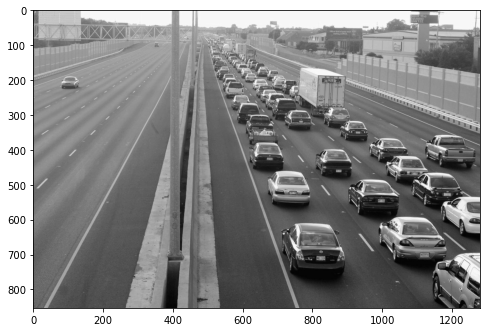

In [39]:
plt.figure(figsize=(8, 8))
plt.imshow(im_gray, cmap="gray")

In [26]:
# A color image has 3 or more channels, each one for the given 
# color space the image is in:
# By default, in opencv color images are in BGR space

im_color = cv.imread("images/highway.jpeg")

print("Color image shape: ", im_color.shape)

Color image shape:  (853, 1280, 3)


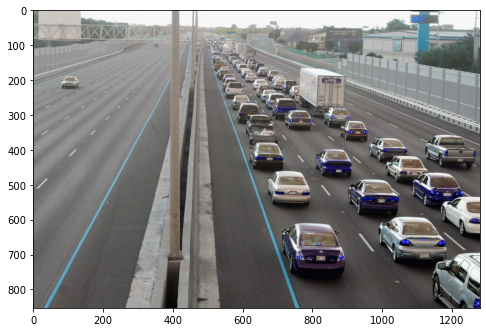

In [42]:
# The image looks kind of strange... Why?
# Because it's in the BGR format, it must be converted
# into RGB!

plt.figure(figsize=(8, 8))
plt.imshow(im_color, norm=Normalize(vmin=0, vmax=1))

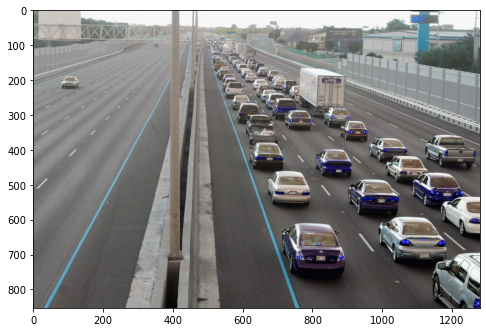

In [44]:
# The color space it's changed back to the RGB and now it looks
# as it should! 

im_color = cv.cvtColor(im_color, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(im_color, norm=Normalize(vmin=0, vmax=1))

## Colorpaces

A color space is a three dimensional space where each axis represents a property of light:

* hue
* chroma/saturation
* light/value

In opencv images can be mapped from one colorspace to another.

The ones that are commonly used are:

* RGB
* HSV: Hue, Saturation, Value
* HLS: Hue, Light, Saturation
* YCrCb: Y for Luma, Cb for blue difference and Cr for red difference

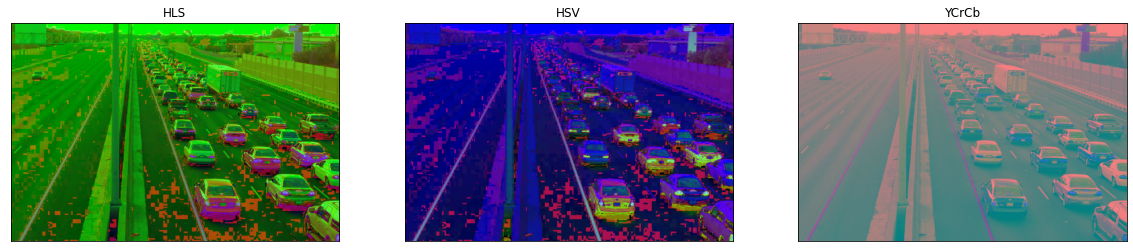

In [69]:
# HSV space

COLOR_SPACES = {
    "HLS": cv.COLOR_RGB2HLS,
    "HSV": cv.COLOR_RGB2HSV,
    "YCrCb": cv.COLOR_RGB2YCrCb
}


fig, axs = plt.subplots(1, 3, figsize=(20, 15))

for n, colorspace in enumerate(COLOR_SPACES.items()):
    axs[n].imshow(cv.cvtColor(im_color, colorspace[1]))
    axs[n].set_title(colorspace[0])
    axs[n].set_xticks([])
    axs[n].set_yticks([])